In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import levene, bartlett
from scipy.stats import boxcox


In [2]:
df = pd.read_csv("Marketing_Data.csv")

In [3]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [4]:
df.shape

(171, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [6]:
df.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:250%;text-align:center;color:#FFFFFF">3) Homojen Varyans Varsayımı 
</h1>

<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Homojen Varyans Varsayımını Sağlayıp Sağlamadığını Nasıl Anlarız ? 
</h1>

In [7]:
X = sm.add_constant(df[['youtube', 'facebook', 'newspaper']])
y = df['sales']
model = sm.OLS(y, X).fit()
residuals = model.resid


<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">1-Grafik Yöntemi
</h1>


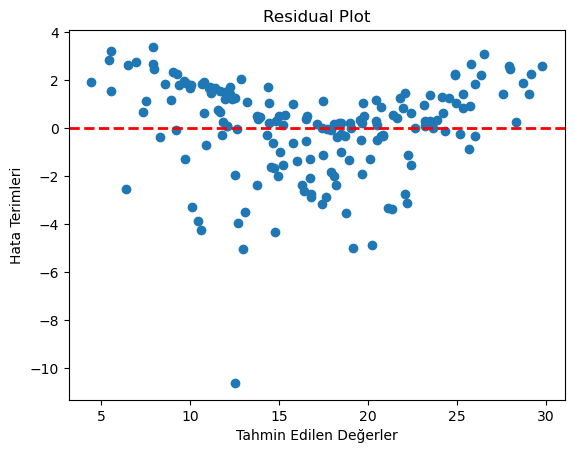

In [8]:
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Sıfır çizgisi ekleyerek homojenliği kontrol et
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Hata Terimleri')
plt.title('Residual Plot')
plt.show()


<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">2-İstatistiksel Testler
</h1>


In [9]:
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']
model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid

In [10]:
# Levene testi
levene_test_stat, levene_p_value = levene(df['youtube'], df['facebook'], df['newspaper'], df['sales'])
print(f'Levene Test İstatistiği: {levene_test_stat}\np-value: {levene_p_value}')

# Bartlett testi
bartlett_test_stat, bartlett_p_value = bartlett(df['youtube'], df['facebook'], df['newspaper'], df['sales'])
print(f'Bartlett Test İstatistiği: {bartlett_test_stat}\np-value: {bartlett_p_value}')

Levene Test İstatistiği: 357.65675377890085
p-value: 2.4108293571492655e-139
Bartlett Test İstatistiği: 1136.4888102861225
p-value: 4.412601938667403e-246


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Levene Testi
</h1>



In [11]:
levene_statistic, levene_p_value = levene(df['youtube'], df['facebook'], df['newspaper'], df['sales'])

if levene_p_value < 0.05:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')

Levene Test İstatistiği: 357.65675377890085
Levene Test p-değeri: 2.4108293571492655e-139
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Bartlett Testi
</h1>



In [12]:
bartlett_statistic, bartlett_p_value = bartlett(df['youtube'], df['facebook'], df['newspaper'], df['sales'])

alpha = 0.05 
if bartlett_p_value < alpha:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')

Bartlett Test İstatistiği: 1136.4888102861225
Bartlett Test p-değeri: 4.412601938667403e-246
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Homojen Varyans Varsayımı Bozulduğunda Nasıl Düzeltilir ? 
</h1>

<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">1)DÖNÜŞÜMLER
</h1>


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Logaritmik Dönüşüm
</h1>



In [13]:
epsilon = 1e-10
df_log = df.copy()
df_log['youtube'] = np.log(df['youtube']+epsilon)
df_log['facebook'] = np.log(df['facebook']+epsilon)
df_log['newspaper'] = np.log(df['newspaper']+epsilon)
df_log['sales'] = np.log(df['sales']+epsilon)


###### Logaritmik dönüşüm yaptıktan sonra tekrardan test edelim

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Levene Testi
</h1>


In [14]:
levene_statistic, levene_p_value = levene(df_log['youtube'], df_log['facebook'], df_log['newspaper'], df_log['sales'])

if levene_p_value < 0.05:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')

Levene Test İstatistiği: 8.17184481333151
Levene Test p-değeri: 2.3789130864989898e-05
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Bartlett Testi
</h1>



In [15]:
bartlett_statistic, bartlett_p_value = bartlett(df_log['youtube'], df_log['facebook'], df_log['newspaper'], df_log['sales'])

alpha = 0.05 
if bartlett_p_value < alpha:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')

Bartlett Test İstatistiği: 427.57951577127454
Bartlett Test p-değeri: 2.3482727317469958e-92
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Log1p Dönüşüm
</h1>

In [16]:
epsilon = 1e-10
df_log = df.copy()
df_log['youtube'] = np.log1p(df['youtube']+epsilon)
df_log['facebook'] = np.log1p(df['facebook']+epsilon)
df_log['newspaper'] = np.log1p(df['newspaper']+epsilon)
df_log['sales'] = np.log1p(df['sales']+epsilon)


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Levene Testi
</h1>


In [17]:
levene_statistic, levene_p_value = levene(df_log['youtube'], df_log['facebook'], df_log['newspaper'], df_log['sales'])

if levene_p_value < 0.05:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')

Levene Test İstatistiği: 20.900062285866305
Levene Test p-değeri: 5.822085305725142e-13
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Bartlett Testi
</h1>



In [18]:
bartlett_statistic, bartlett_p_value = bartlett(df_log['youtube'], df_log['facebook'], df_log['newspaper'], df_log['sales'])

alpha = 0.05 
if bartlett_p_value < alpha:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')


Bartlett Test İstatistiği: 142.63301405984515
Bartlett Test p-değeri: 1.0225818161192663e-30
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">np.log2 Dönüşüm
</h1>

In [19]:
epsilon = 1e-10
df_log = df.copy()
df_log['youtube'] = np.log2(df['youtube']+epsilon)
df_log['facebook'] = np.log2(df['facebook']+epsilon)
df_log['newspaper'] = np.log2(df['newspaper']+epsilon)
df_log['sales'] = np.log2(df['sales']+epsilon)

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Levene Testi
</h1>


In [20]:
levene_statistic, levene_p_value = levene(df_log['youtube'], df_log['facebook'], df_log['newspaper'], df_log['sales'])

if levene_p_value < 0.05:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')


Levene Test İstatistiği: 8.17184481333151
Levene Test p-değeri: 2.3789130864989898e-05
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Bartlett Testi
</h1>



In [21]:
bartlett_statistic, bartlett_p_value = bartlett(df_log['youtube'], df_log['facebook'], df_log['newspaper'], df_log['sales'])

alpha = 0.05 
if bartlett_p_value < alpha:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')


Bartlett Test İstatistiği: 427.5795157712747
Bartlett Test p-değeri: 2.348272731746795e-92
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">np.log10 Dönüşüm
</h1>

In [22]:
epsilon = 1e-10
df_log = df.copy()
df_log['youtube'] = np.log10 (df['youtube']+epsilon)
df_log['facebook'] = np.log10 (df['facebook']+epsilon)
df_log['newspaper'] = np.log10 (df['newspaper']+epsilon)
df_log['sales'] = np.log10 (df['sales']+epsilon)

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Levene Testi
</h1>


In [23]:
levene_statistic, levene_p_value = levene(df_log['youtube'], df_log['facebook'], df_log['newspaper'], df_log['sales'])

if levene_p_value < 0.05:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')


Levene Test İstatistiği: 8.171844813331504
Levene Test p-değeri: 2.3789130864989898e-05
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Bartlett Testi
</h1>



In [24]:
bartlett_statistic, bartlett_p_value = bartlett(df_log['youtube'], df_log['facebook'], df_log['newspaper'], df_log['sales'])

alpha = 0.05 
if bartlett_p_value < alpha:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşit değilidr. (homojen varyans yoktur).')
else:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')


Bartlett Test İstatistiği: 427.57951577127415
Bartlett Test p-değeri: 2.348272731747465e-92
Grupların varyansları eşit değilidr. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Karekök Dönüşüm
</h1>

In [25]:
df_sqrt = df.copy()
df_sqrt['youtube'] = np.sqrt(df['youtube'])
df_sqrt['facebook'] = np.sqrt(df['facebook'])
df_sqrt['newspaper'] = np.sqrt(df['newspaper'])
df_sqrt['sales'] = np.sqrt(df['sales'])

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Levene Testi
</h1>


In [26]:
levene_statistic, levene_p_value = levene(df_sqrt['youtube'], df_sqrt['facebook'], df_sqrt['newspaper'], df_sqrt['sales'])

if levene_p_value < 0.05:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşit değilidr. (homojen varyans yoktur).')
else:
    print(f'Levene Test İstatistiği: {levene_statistic}')
    print(f'Levene Test p-değeri: {levene_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')


Levene Test İstatistiği: 115.81668987350814
Levene Test p-değeri: 1.3767762668605611e-60
Grupların varyansları eşit değilidr. (homojen varyans yoktur).


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:left;color:#FFFFFF">Bartlett Testi
</h1>



In [27]:
bartlett_statistic, bartlett_p_value = bartlett(df_sqrt['youtube'], df_sqrt['facebook'], df_sqrt['newspaper'], df_sqrt['sales'])

alpha = 0.05 
if bartlett_p_value < alpha:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşit değildir. (homojen varyans yoktur).')
else:
    print(f'Bartlett Test İstatistiği: {bartlett_statistic}')
    print(f'Bartlett Test p-değeri: {bartlett_p_value}')
    print('Grupların varyansları eşittir. (homojen varyans vardır).')


Bartlett Test İstatistiği: 431.31634734533435
Bartlett Test p-değeri: 3.6407146693983503e-93
Grupların varyansları eşit değildir. (homojen varyans yoktur).


<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">2)Ağırlıklı En Küçük Kareler (Weighted Least Squares - WLS)
</h1>


In [28]:
df = df.copy()

In [29]:
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']
model = sm.OLS(y, sm.add_constant(X)).fit()
residuals = model.resid
variance_estimate = np.var(residuals)

#Varyanslarla ters orantılı olarak ağırlıklar belirlendi.
weights = 1 / variance_estimate

model_wls = sm.WLS(y, X, weights=weights).fit()


In [30]:
residuals = model_wls.resid

statistic, p_value = bartlett(residuals, X['youtube'], X['facebook'], X['newspaper'])
alpha = 0.05
if p_value > alpha:
    print("Hata terimi varyansları homojendir (kabul edilir).")
else:
    print("Hata terimi varyansları homojen değildir (reddedilir).")

Hata terimi varyansları homojen değildir (reddedilir).


In [31]:
model_wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            WLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3112.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                   6.25e-147
Time:                        22:19:33   Log-Likelihood:                         -392.39
No. Observations:                 171   AIC:                                      790.8
Df Residuals:                     168   BIC:                                      800.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
youtube        0.0531      0.001     35.921      0.000       0.050       0.056
facebook       0.2217      0.010     22.506      0.000       0.202       0.241
newspaper      0.0233      0.007      3.157      0.002       0.009       0.038
==============================================================================
Omnibus:                        5.638   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                6.461
Skew:                          -0.242   Prob(JB):                       0.0395
Kurtosis:                       3.820   Cond. No.                         12.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">3)Robust Standart Hata Estimasyonu: 
</h1>


In [32]:
df = df.copy()

In [33]:
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']
model_robust = sm.RLM(y, X).fit()

residual = model_robust.resid


In [34]:
residuals = model_robust.resid

statistic, p_value = bartlett(residuals, X['youtube'], X['facebook'], X['newspaper'])
alpha = 0.05
if p_value > alpha:
    print("Hata terimi varyansları homojendir (kabul edilir).")
else:
    print("Hata terimi varyansları homojen değildir (reddedilir).")

Hata terimi varyansları homojen değildir (reddedilir).


In [35]:
model_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  sales   No. Observations:                  171
Model:                            RLM   Df Residuals:                      168
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 22 Jan 2024                                         
Time:                        22:19:34                                         
No. Iterations:                    17                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
youtube        0.0525      0.001     35.138      0.000       0.050       0.055
facebook       0.2312      0.010     23.184      0.000       0.212       0.251
newspaper      0.0181      0.007      2.420      0.016       0.003       0.033
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""